In [1]:
import scanpy
import sctoolbox.receptor_ligand as rl

__Use `help(<function_name>)` for information on the parameters. E.g. `help(lr.download_db)`__

# Setup

## Load data
The dataset must be clustered for a receptor-ligand analysis.

In [2]:
# TODO add correct data location
# adata = scanpy.read_h5ad(filename='')
adata = scanpy.datasets.pbmc3k_processed()

## Download receptor-ligand database
Provide a path to a table with receptor-ligand interactions. Will be stored in the adata object (`adata.uns['receptor-ligand]['database']`).

In [3]:
rl.download_db(adata=adata,
               db_path='/workspace/celltalkdb/human_lr_pair.tsv',
               ligand_column='ligand_gene_symbol',
               receptor_column='receptor_gene_symbol',
               inplace=True,
               overwrite=False)

## Compute interactions
Create a table of receptor-ligand interactions between given groups. This table is used for plotting. Will be stored in the adata object (`adata.uns['receptor-ligand]['interactions']`)

In [4]:
rl.calculate_interaction_table(adata=adata,
                               cluster_column="louvain",
                               gene_index=None,
                               normalize=1000,
                               inplace=True,
                               overwrite=False)

finding receptor-ligand interactions: 100%|██████████| 3398/3398 [00:00<00:00, 18173.46it/s]


# Plotting

## Violin
Show the distribution of interaction scores for all group combinations.

Scores `> 0` can be interpreted as receptor-ligand interactions enriched for group combination.  
Scores `< 0` can be interpreted as receptor-ligand interactions depleted for group combination.

array([<AxesSubplot:title={'center':'Cluster B cells'}, xlabel='Cluster', ylabel='interaction_score'>,
       <AxesSubplot:title={'center':'Cluster CD14+ Monocytes'}, xlabel='Cluster', ylabel='interaction_score'>,
       <AxesSubplot:title={'center':'Cluster CD4 T cells'}, xlabel='Cluster', ylabel='interaction_score'>,
       <AxesSubplot:title={'center':'Cluster CD8 T cells'}, xlabel='Cluster', ylabel='interaction_score'>,
       <AxesSubplot:title={'center':'Cluster Dendritic cells'}, xlabel='Cluster', ylabel='interaction_score'>,
       <AxesSubplot:title={'center':'Cluster FCGR3A+ Monocytes'}, xlabel='Cluster', ylabel='interaction_score'>,
       <AxesSubplot:title={'center':'Cluster Megakaryocytes'}, xlabel='Cluster', ylabel='interaction_score'>,
       <AxesSubplot:title={'center':'Cluster NK cells'}, xlabel='Cluster', ylabel='interaction_score'>],
      dtype=object)

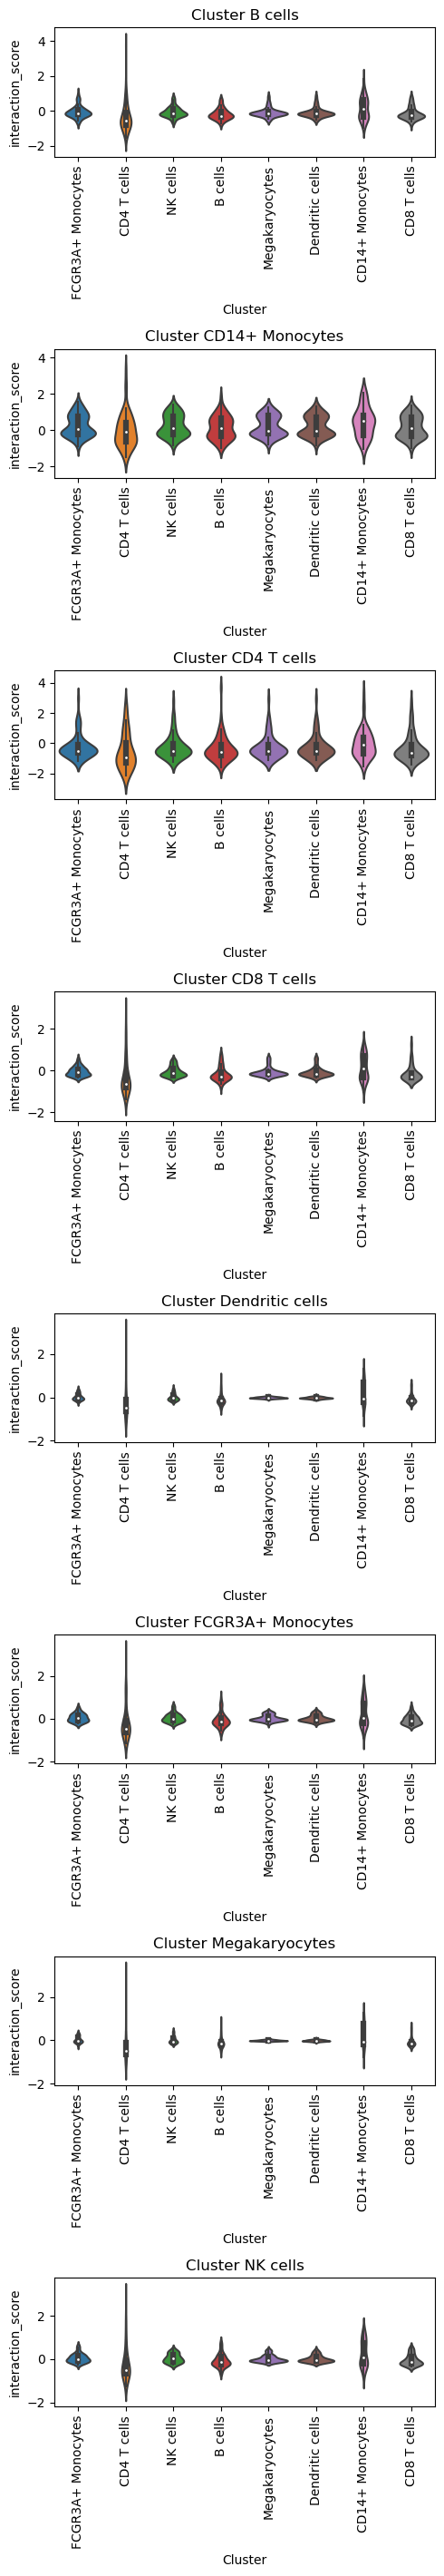

In [5]:
rl.interaction_violin_plot(adata,
                           min_perc=0,
                           output=None,
                           figsize=(5, 30),
                           dpi=100)

## Network
Show a network graph of number of interactions between groups.

Max weight 21


array([<AxesSubplot:>, <AxesSubplot:title={'center':'Interaction count'}>],
      dtype=object)

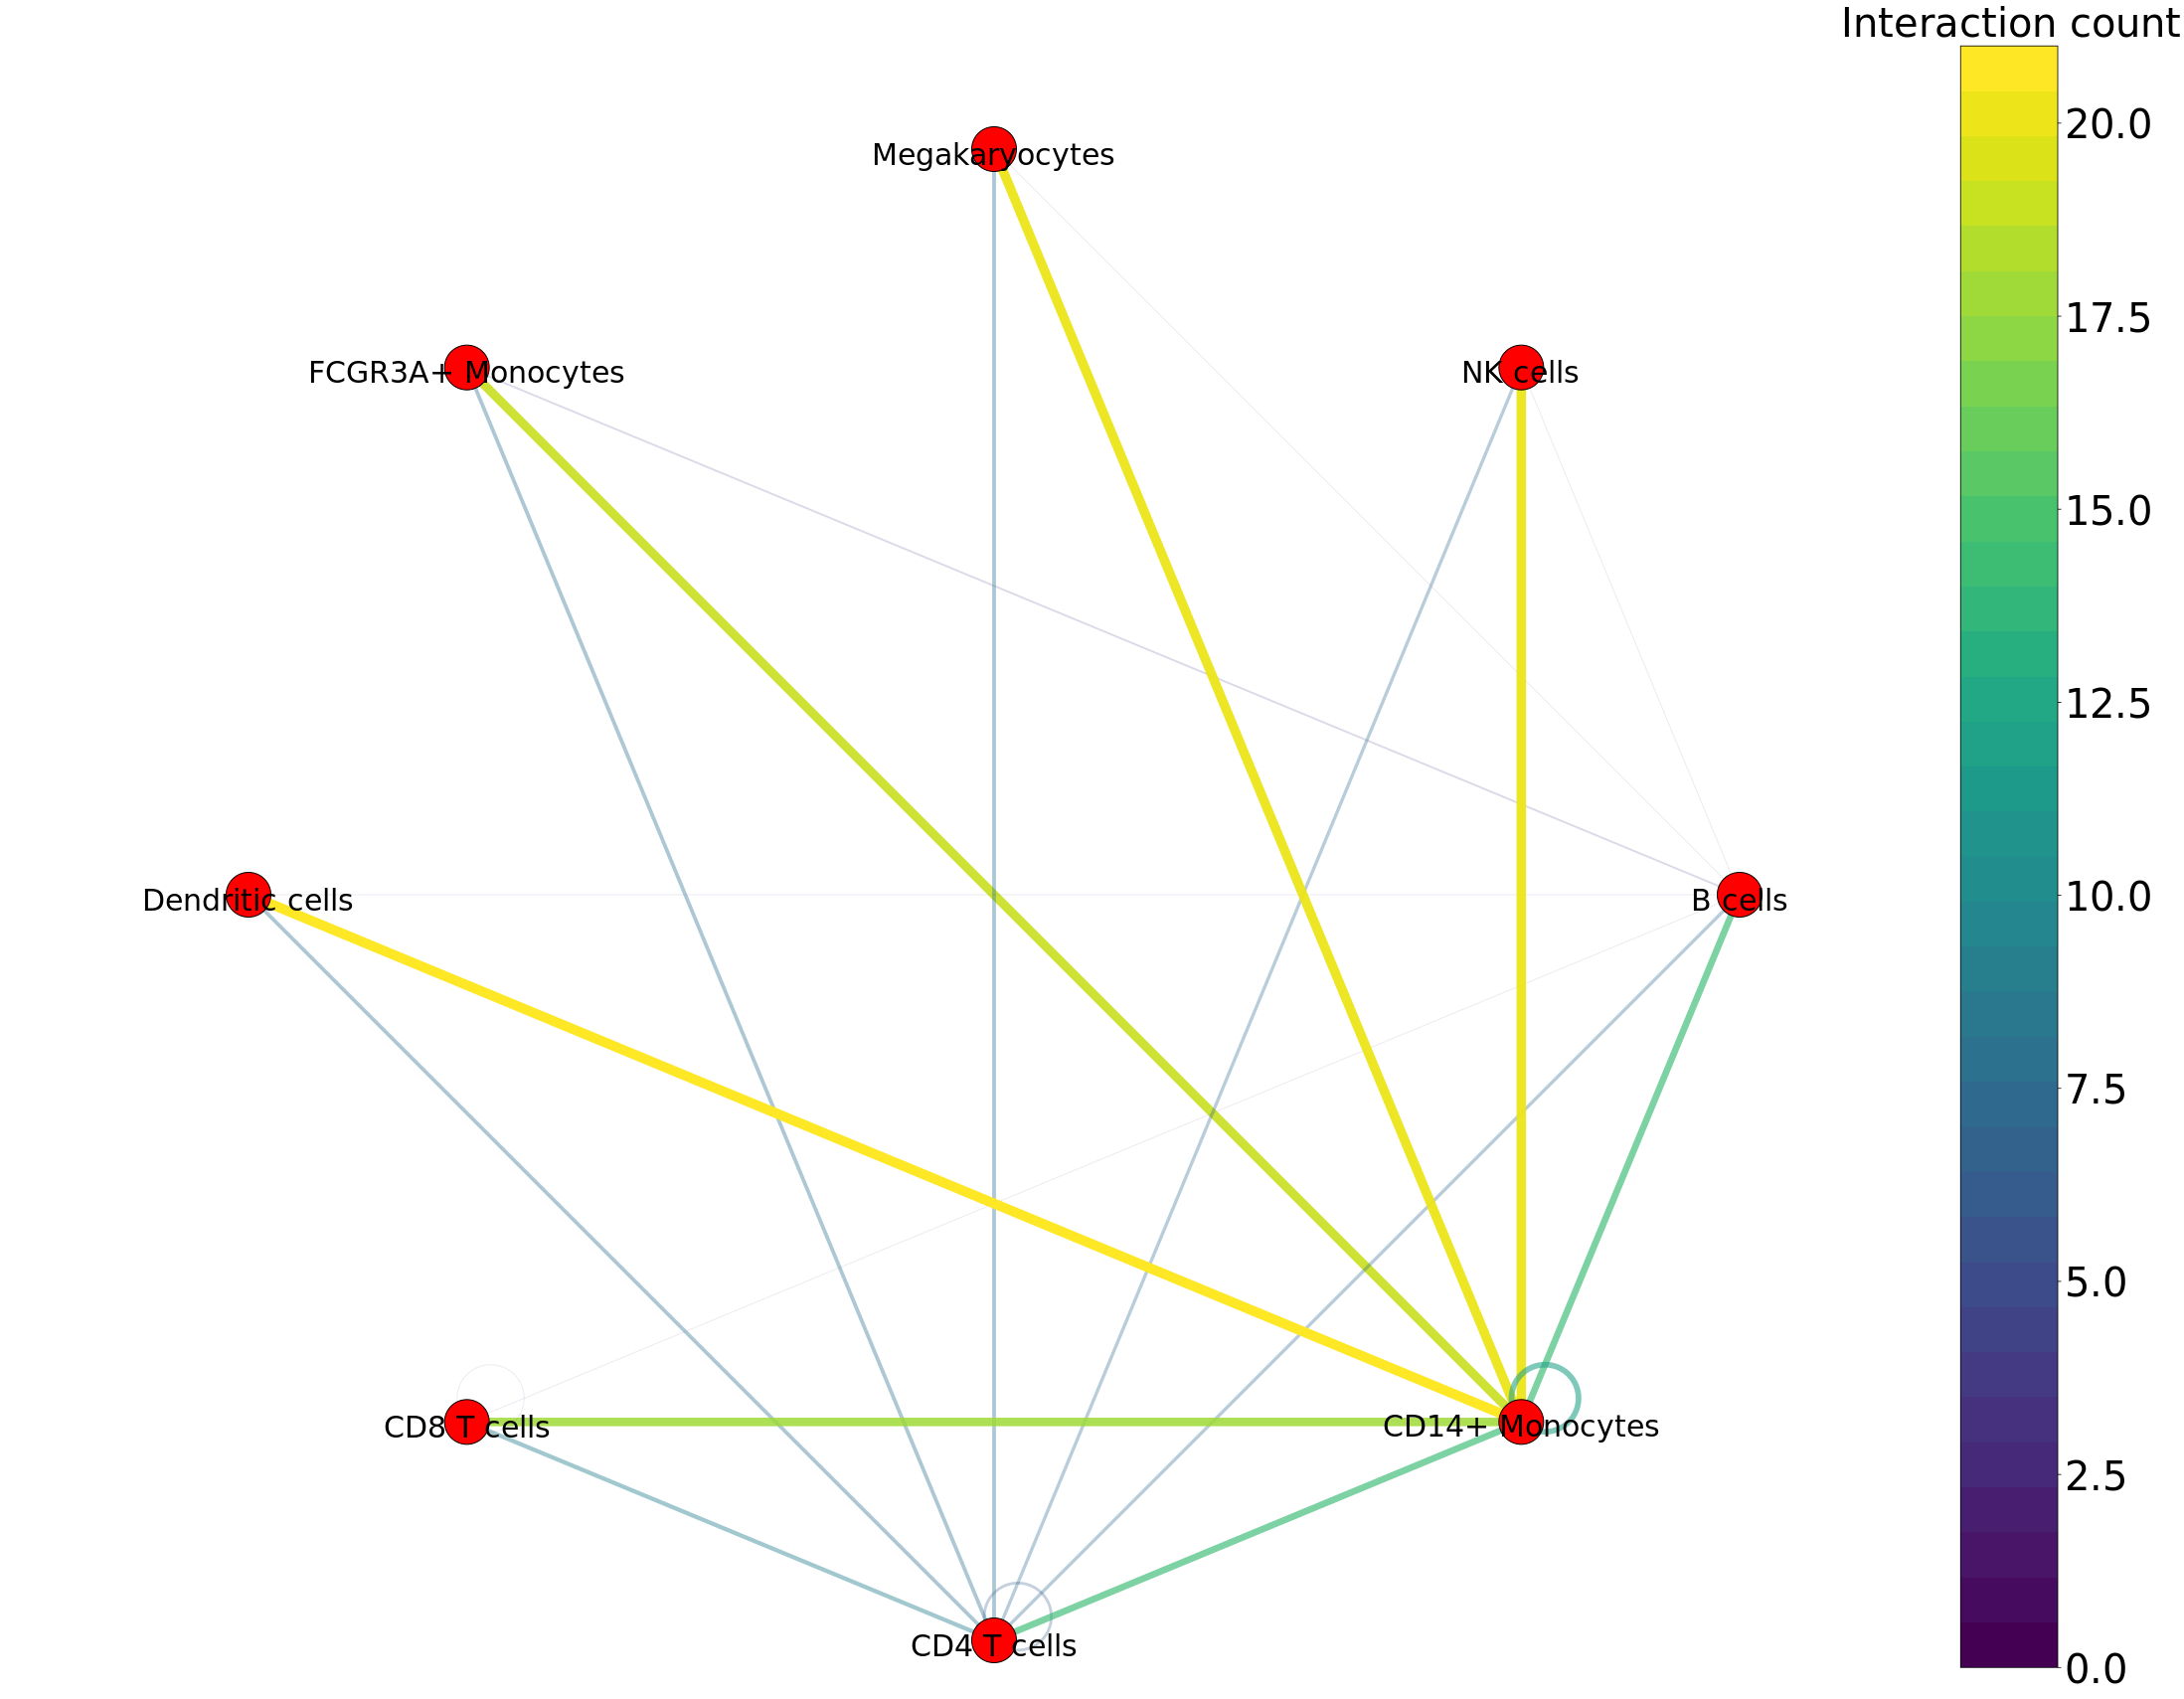

In [6]:
import matplotlib

prior_backend = matplotlib.get_backend()
matplotlib.use("cairo")

rl.hairball(adata,
            min_perc=0,
            interaction_score=0,
            interaction_perc=90,
            output=None,
            title=None,
            color_min=0,
            color_max=None)

In [7]:
matplotlib.use(prior_backend)

## Receptor-ligand connections
Show a detailed view on receptor-ligand pairs and their strength between groups.

- __receptor-/ ligand score__: Gene enriched (`> 0`) or depleted (`< 0`) for specific group.
- __receptor-/ ligand percent__: Percent of cells in a group expressing gene.
- __interaction score__: receptor-ligand pair enriched (`> 0`) or depleted (`< 0`) between groups.

array([<AxesSubplot:title={'center':'Receptor'}, xlabel='Cluster'>,
       <AxesSubplot:title={'center':'Ligand'}, xlabel='Cluster'>],
      dtype=object)

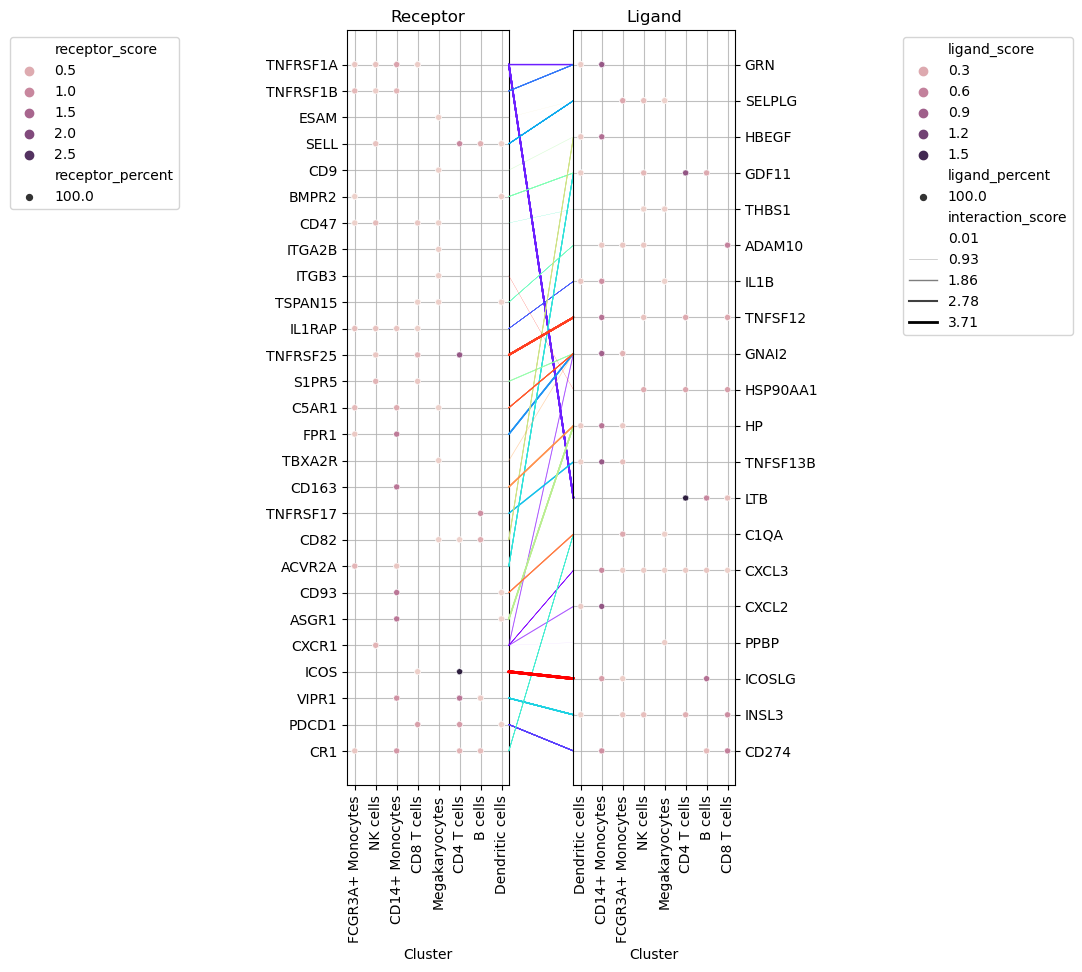

In [8]:
rl.connectionPlot(adata=adata, 
                  restrict_to=None,
                  figsize=(5, 10),
                  dpi=100,
                  connection_alpha="interaction_score",
                  output=None,
                  title=None,
                  receptor_cluster_col="receptor_cluster",
                  receptor_col="receptor_gene",
                  receptor_hue="receptor_score",
                  receptor_size="receptor_percent",
                  ligand_cluster_col="ligand_cluster",
                  ligand_col="ligand_gene",
                  ligand_hue="ligand_score",
                  ligand_size="ligand_percent",
                  filter="receptor_score > 0 & ligand_score > 0 & interaction_score > 0",
                  lw_multiplier=2,
                  wspace=0.4,
                  line_colors="rainbow")